# 方策勾配法の実装

In [1]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import numpy as np
import gym
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L


class Policy(Model):
    def __init__(self, action_size):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(action_size)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.softmax(self.l2(x))
        return x


class Agent:
    def __init__(self):
        self.gamma = 0.98
        self.lr = 0.0002
        self.action_size = 2

        self.memory = []
        self.pi = Policy(self.action_size)
        self.optimizer = optimizers.Adam(self.lr)
        self.optimizer.setup(self.pi)

    def get_action(self, state):
        state = state[np.newaxis, :]
        probs = self.pi(state)
        probs = probs[0]
        action = np.random.choice(len(probs), p=probs.data)
        return action, probs[action]

    def add(self, reward, prob):
        data = (reward, prob)
        self.memory.append(data)

    def update(self):
        self.pi.cleargrads()

        G, loss = 0, 0
        for reward, prob in reversed(self.memory):
            G = reward + self.gamma * G

        for reward, prob in self.memory:
            loss += -F.log(prob) * G

        loss.backward()
        self.optimizer.update()
        self.memory = []

/Users/yamauchito_satoshi/Documents/env/zero_DeepL4/lib/python3.8/site-packages/dezero/transforms.py:50: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  def __init__(self, size, mode=Image.BILINEAR):
/Users/yamauchito_satoshi/Documents/env/zero_DeepL4/lib/python3.8/site-packages/dezero/transforms.py:154: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def __init__(self, dtype=np.int):


In [2]:
env = gym.make("CartPole-v0")
state = env.reset()
agent = Agent()

action, prob = agent.get_action(state)
print("action:", action)
print("prob:", prob)

G = 100.0
J = G * F.log(prob)
print("J:", J)

J.backward()

action: 0
prob: variable(0.49148357)
J: variable(-71.03267908096313)


/Users/yamauchito_satoshi/Documents/env/zero_DeepL4/lib/python3.8/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/Users/yamauchito_satoshi/Documents/env/zero_DeepL4/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Users/yamauchito_satoshi/Documents/env/zero_DeepL4/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


/Users/yamauchito_satoshi/Documents/env/zero_DeepL4/lib/python3.8/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/Users/yamauchito_satoshi/Documents/env/zero_DeepL4/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Users/yamauchito_satoshi/Documents/env/zero_DeepL4/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


episode :0, total reward : 12.0
episode :100, total reward : 8.0
episode :200, total reward : 17.0
episode :300, total reward : 11.0
episode :400, total reward : 51.0
episode :500, total reward : 36.0
episode :600, total reward : 73.0
episode :700, total reward : 33.0
episode :800, total reward : 25.0
episode :900, total reward : 26.0
episode :1000, total reward : 47.0
episode :1100, total reward : 51.0
episode :1200, total reward : 108.0
episode :1300, total reward : 51.0
episode :1400, total reward : 79.0
episode :1500, total reward : 30.0
episode :1600, total reward : 54.0
episode :1700, total reward : 39.0
episode :1800, total reward : 43.0
episode :1900, total reward : 72.0
episode :2000, total reward : 120.0
episode :2100, total reward : 133.0
episode :2200, total reward : 55.0
episode :2300, total reward : 119.0
episode :2400, total reward : 142.0
episode :2500, total reward : 117.0
episode :2600, total reward : 180.0
episode :2700, total reward : 200.0
episode :2800, total rewa

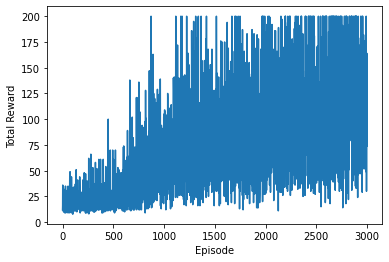

In [5]:
sys.path.append(os.path.abspath("../"))
from common.utils import plot_total_reward

episodes = 3000
env = gym.make('CartPole-v0')
agent = Agent()
reward_history = []

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)
        next_state, reward, done, info = env.step(action)

        agent.add(reward, prob)
        state = next_state
        total_reward += reward

    agent.update()

    reward_history.append(total_reward)
    if episode % 100 == 0:
        print("episode :{}, total reward : {:.1f}".format(episode, total_reward))


# plot
plot_total_reward(reward_history)

# REINFORCE

In [6]:
class Agent_REINFORCE(Agent):
    def update(self):
        self.pi.cleargrads()

        G, loss = 0, 0
        for reward, prob in reversed(self.memory):
            G = reward + self.gamma * G
            loss += -F.log(prob) * G

        loss.backward()
        self.optimizer.update()
        self.memory = []

/Users/yamauchito_satoshi/Documents/env/zero_DeepL4/lib/python3.8/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/Users/yamauchito_satoshi/Documents/env/zero_DeepL4/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Users/yamauchito_satoshi/Documents/env/zero_DeepL4/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


episode :0, total reward : 23.0
episode :100, total reward : 22.0
episode :200, total reward : 17.0
episode :300, total reward : 54.0
episode :400, total reward : 35.0
episode :500, total reward : 27.0
episode :600, total reward : 38.0
episode :700, total reward : 118.0
episode :800, total reward : 109.0
episode :900, total reward : 79.0
episode :1000, total reward : 184.0
episode :1100, total reward : 64.0
episode :1200, total reward : 34.0
episode :1300, total reward : 171.0
episode :1400, total reward : 200.0
episode :1500, total reward : 200.0
episode :1600, total reward : 200.0
episode :1700, total reward : 151.0
episode :1800, total reward : 200.0
episode :1900, total reward : 200.0
episode :2000, total reward : 200.0
episode :2100, total reward : 200.0
episode :2200, total reward : 200.0
episode :2300, total reward : 200.0
episode :2400, total reward : 161.0
episode :2500, total reward : 191.0
episode :2600, total reward : 200.0
episode :2700, total reward : 200.0
episode :2800,

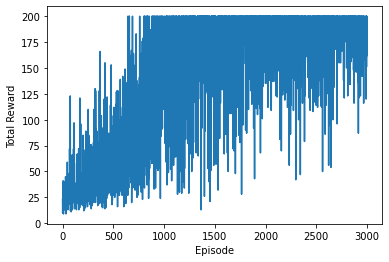

In [7]:
sys.path.append(os.path.abspath("../"))
from common.utils import plot_total_reward

episodes = 3000
env = gym.make('CartPole-v0')
agent = Agent_REINFORCE()
reward_history = []

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)
        next_state, reward, done, info = env.step(action)

        agent.add(reward, prob)
        state = next_state
        total_reward += reward

    agent.update()

    reward_history.append(total_reward)
    if episode % 100 == 0:
        print("episode :{}, total reward : {:.1f}".format(episode, total_reward))


# plot
plot_total_reward(reward_history)